# Pro-processing index

In [1]:
number_of_file = 10

In [2]:
file_name = '../../regions/local/{}'.format(number_of_file)

In [3]:
obj = []
with open(file_name) as f:
  counter_ = 0
  for line in f:
      if counter_ < 2: # for skipping 2 line header
        counter_ += 1
      else:
        # print(line.split())
        obj.append(line.split())

In [4]:
print(obj)

[['box(14180.812,2782.3144,100,100,0)', '#', 'text={39.Stellar}'], ['box(10351.446,3004.9325,100,100,0)', '#', 'text={57.Galaxy}'], ['box(16467.087,8108.0617,100,100,0)', '#', 'text={31.Unknown}'], ['box(13972.544,9931.3977,100,100,0)', '#', 'text={40.Cluster}'], ['box(12110.164,10544.885,100,100,0)', '#', 'text={46.Cluster}'], ['box(11974.225,10505.511,100,100,0)', '#', 'text={49.Cluster}'], ['box(4723.7498,8671.958,100,100,0)', '#', 'text={136.Unknown}'], ['box(4440.4576,10088.686,100,100,0)', '#', 'text={141.Unknown}'], ['box(3790.2594,14707.911,100,100,0)', '#', 'text={152.Unknown}'], ['box(3291.923,12825.445,100,100,0)', '#', 'text={159.Unknown}'], ['box(3179.8079,13583.684,100,100,0)', '#', 'text={162.Unknown}'], ['box(3148.089,10210.909,100,100,0)', '#', 'text={163.Unknown}'], ['box(2355.7681,13005.801,100,100,0)', '#', 'text={174.Unknown}'], ['box(9649.6117,15732.263,100,100,0)', '#', 'text={62.Stellar}'], ['box(9376.1173,13305.8,100,100,0)', '#', 'text={69.Stellar}'], ['box(91

In [204]:
def extract_box(obj):
  obj = obj.replace('(', ',').replace(')', ',').split(',')
  x_center = int(float(obj[1]))
  y_center = int(float(obj[2]))
  crop_x_size = int(obj[3])
  crop_y_size = int(obj[4])
  return x_center, y_center, crop_x_size, crop_y_size
# box(4123.3381,3690.8642,100,100,0) ->  (4123, 3690, 100, 100)

In [205]:
def extract_labels(obj):
  temp_ = obj.replace('{', ',').replace('}', ',').split(',')
  temp_ = temp_[1].split('.')
  idx_obj = temp_[0]
  labels_obj = temp_[1]
  return labels_obj, idx_obj
# 'text={254.Cluster}' -> ('Cluster', '254')

In [206]:
data = []
for i in obj:
  x_center, y_center, crop_x_size, crop_y_size = extract_box(i[0])
  labels_obj, idx_obj = extract_labels(i[2])
  temp_ = [x_center, y_center, crop_x_size, crop_y_size, labels_obj, idx_obj]
  data.append(temp_)

In [207]:
data

[[14180, 2782, 100, 100, 'Stellar', '39'],
 [10351, 3004, 100, 100, 'Galaxy', '57'],
 [16467, 8108, 100, 100, 'Unknown', '31'],
 [13972, 9931, 100, 100, 'Cluster', '40'],
 [12110, 10544, 100, 100, 'Cluster', '46'],
 [11974, 10505, 100, 100, 'Cluster', '49'],
 [4723, 8671, 100, 100, 'Unknown', '136'],
 [4440, 10088, 100, 100, 'Unknown', '141'],
 [3790, 14707, 100, 100, 'Unknown', '152'],
 [3291, 12825, 100, 100, 'Unknown', '159'],
 [3179, 13583, 100, 100, 'Unknown', '162'],
 [3148, 10210, 100, 100, 'Unknown', '163'],
 [2355, 13005, 100, 100, 'Unknown', '174'],
 [9649, 15732, 100, 100, 'Stellar', '62'],
 [9376, 13305, 100, 100, 'Stellar', '69'],
 [9155, 16522, 100, 100, 'Unknown', '71'],
 [7080, 13012, 100, 100, 'Unknown', '98'],
 [6037, 15593, 100, 100, 'Cluster', '120']]

# Cropping Data

## Survey

In [208]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import random

In [209]:
file_i = '../../data/fits/{}.fits'.format(number_of_file)

In [210]:
hdu_list = fits.open(file_i, do_not_scale_image_data=True)
hdu_list.info()
# hdu_list.close()

Filename: ../data/fits/10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1878   ()      
  1  SCI           1 ImageHDU        82   (20921, 16750)   float32   
  2  WHT           1 ImageHDU        44   (20921, 16750)   float32   
  3  CTX           1 ImageHDU        35   ()      
  4  HDRTAB        1 BinTableHDU    638   72R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D, D, 1A, K

In [211]:
print(hdu_list['SCI'])

In [212]:
image_data = hdu_list['SCI'].data
# image_data = hdu_list['SCI'].data

In [213]:
np.count_nonzero(np.isnan(image_data))


248504820

In [214]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: nan
Max: nan
Mean: nan
Stdev: nan


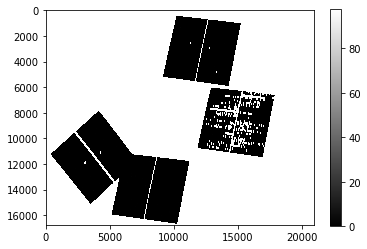

In [215]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

## Extraction

In [216]:
# [4123, 3690, 100, 100, 'Cluster', '254'],

In [217]:
t_ = 1
pos_x = data[t_][0]
pos_y = data[t_][1]
crop_size_x = data[t_][2]
crop_size_y = data[t_][3]

if (crop_size_x * crop_size_x) % 2 != 0: # odd number of size
  rad_x = crop_size_x // 2
  rad_y = crop_size_y // 2

  start_x = pos_x-rad_x
  end_x = pos_x+rad_x + 1

  start_y = pos_y-rad_y
  end_y = pos_y+rad_y + 1
else: # even number of size
  rad_x = crop_size_x // 2
  rad_y = crop_size_y // 2

  start_x = pos_x-rad_x
  end_x = pos_x+rad_x

  start_y = pos_y-rad_y
  end_y = pos_y+rad_y

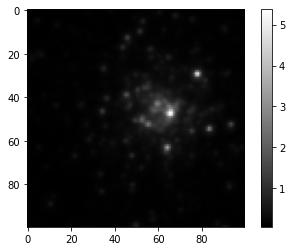

In [218]:
example_image = image_data[start_y:end_y, start_x:end_x]
plt.imshow(example_image, cmap='gray')
plt.colorbar()

In [219]:
example_image.shape

(100, 100)

In [220]:
def get_img_area(data, index):
  pos_x = data[index][0]
  pos_y = data[index][1]
  crop_size_x = data[index][2]
  crop_size_y = data[index][3]

  if (crop_size_x * crop_size_x) % 2 != 0: # odd number of size
    rad_x = crop_size_x // 2
    rad_y = crop_size_y // 2

    start_x = pos_x-rad_x
    end_x = pos_x+rad_x + 1

    start_y = pos_y-rad_y
    end_y = pos_y+rad_y + 1
  else: # even number of size
    rad_x = crop_size_x // 2
    rad_y = crop_size_y // 2

    start_x = pos_x-rad_x
    end_x = pos_x+rad_x

    start_y = pos_y-rad_y
    end_y = pos_y+rad_y
  return start_x, end_x, start_y, end_y

## Export the Image Data

In [221]:
for i in range(len(data)):
    start_x, end_x, start_y, end_y = get_img_area(data, i)
    export_data = image_data[start_y:end_y, start_x:end_x]
    hdu = fits.PrimaryHDU(export_data) # save img into google drive
    hdulist = fits.HDUList([hdu])
    # try:
    #     path = '../../data/images/img_{}_{}.fits'.format(data[i][5], data[i][4])
    #     hdulist.writeto(path)
    # except:
    #     path = '../../data/images/img_{}_{}_{}.fits'.format(data[i][5], data[i][4], random.randint(0, 9999))
    #     hdulist.writeto(path)
